In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
import torchsummary as summary
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report
import pandas as pd
import json
import importlib
import math




try:
    from IPython import get_ipython
    if 'IPKernelApp' not in get_ipython().config:  # Not in a notebook
        from tqdm import tqdm
    else:  # In a notebook
        from tqdm.notebook import tqdm
except ImportError:  # IPython is not installed
    from tqdm import tqdm
import utils
from utils import *

# importlib.reload(utils)


# 2. set up for using GPU if available (with printed confirmation)  
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# 3. checking environment 
try:
    from google.colab import drive
    drive.mount('/content/drive')
    IN_COLAB = True
except:
    IN_COLAB = False

Using cuda device


Files already downloaded and verified
45000
5000
10000


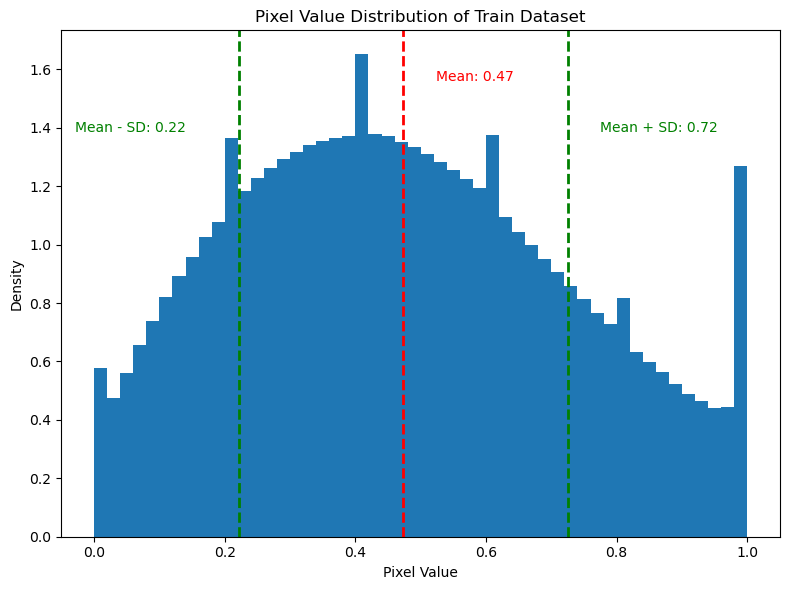

Train Dataset - Mean: 0.47, SD: 0.25


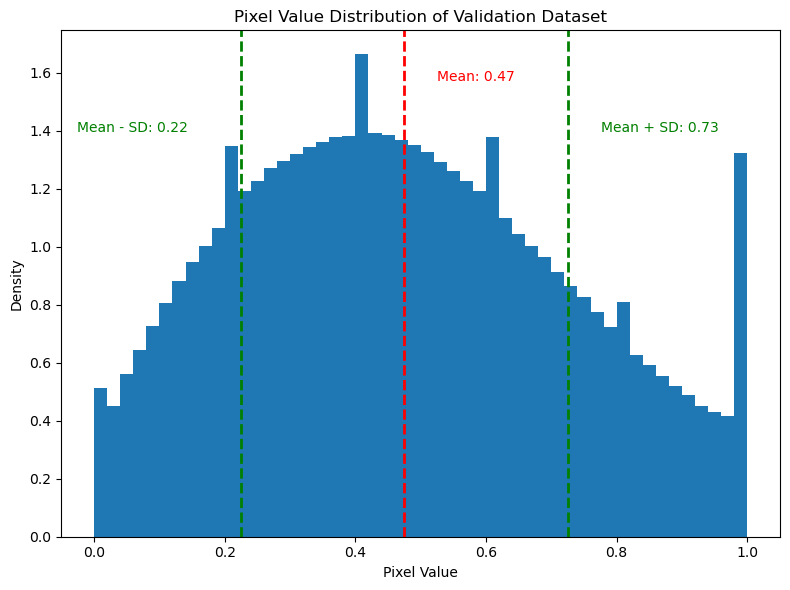

Validation Dataset - Mean: 0.47, SD: 0.25


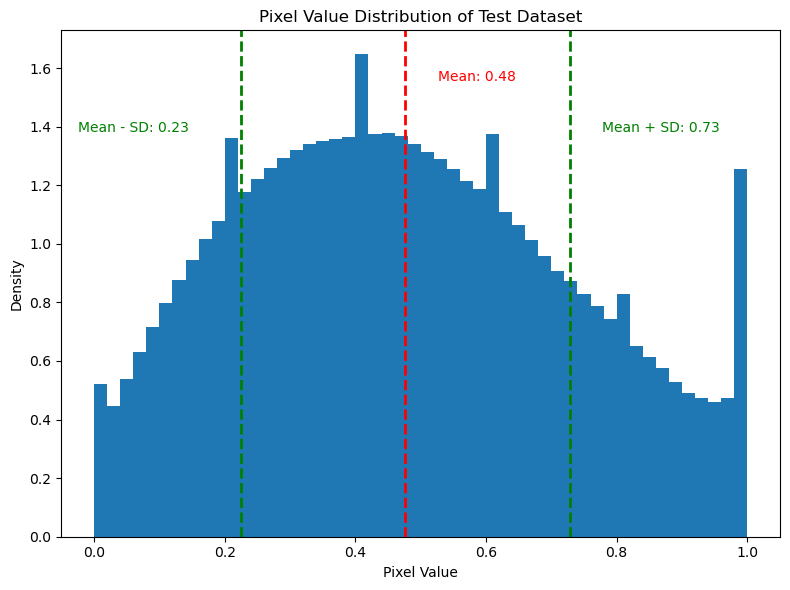

Test Dataset - Mean: 0.48, SD: 0.25


In [13]:
batch_size = 64

torch.manual_seed(0)

transform = transforms.Compose([transforms.ToTensor()])

train_data = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform)

num_validation_samples = 5000
num_train_samples = len(train_data) - num_validation_samples

train_data, val_data = random_split(train_data, [num_train_samples, num_validation_samples])

print(len(train_data)) # 50000 training egs  
print(len(val_data)) # 10000 test egs
print(len(test_data)) # 10000 test egs

train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

import numpy as np
import matplotlib.pyplot as plt

def plot_pixel_distribution(dataloader, dataset_name):
    pixel_values = []
    
    for images, _ in dataloader:
        pixel_values.extend(images.flatten().tolist())
    
    pixel_values = np.array(pixel_values)
    
    mean = np.mean(pixel_values)
    std = np.std(pixel_values)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.hist(pixel_values, bins=50, density=True)
    ax.set_xlabel('Pixel Value')
    ax.set_ylabel('Density')
    ax.set_title(f'Pixel Value Distribution of {dataset_name} Dataset')
    
    # Add mean and SD to the plot
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=2)
    ax.text(mean + 0.05, ax.get_ylim()[1] * 0.9, f'Mean: {mean:.2f}', color='red')
    ax.axvline(mean + std, color='green', linestyle='dashed', linewidth=2)
    ax.text(mean + std + 0.05, ax.get_ylim()[1] * 0.8, f'Mean + SD: {mean + std:.2f}', color='green')
    ax.axvline(mean - std, color='green', linestyle='dashed', linewidth=2)
    ax.text(mean - std - 0.25, ax.get_ylim()[1] * 0.8, f'Mean - SD: {mean - std:.2f}', color='green')
    
    plt.tight_layout()
    plt.show()
    
    print(f"{dataset_name} Dataset - Mean: {mean:.2f}, SD: {std:.2f}")

# Inspect pixel value distribution for train dataset
plot_pixel_distribution(train_dataloader, 'Train')

# Inspect pixel value distribution for validation dataset
plot_pixel_distribution(val_dataloader, 'Validation')

# Inspect pixel value distribution for test dataset
plot_pixel_distribution(test_dataloader, 'Test')

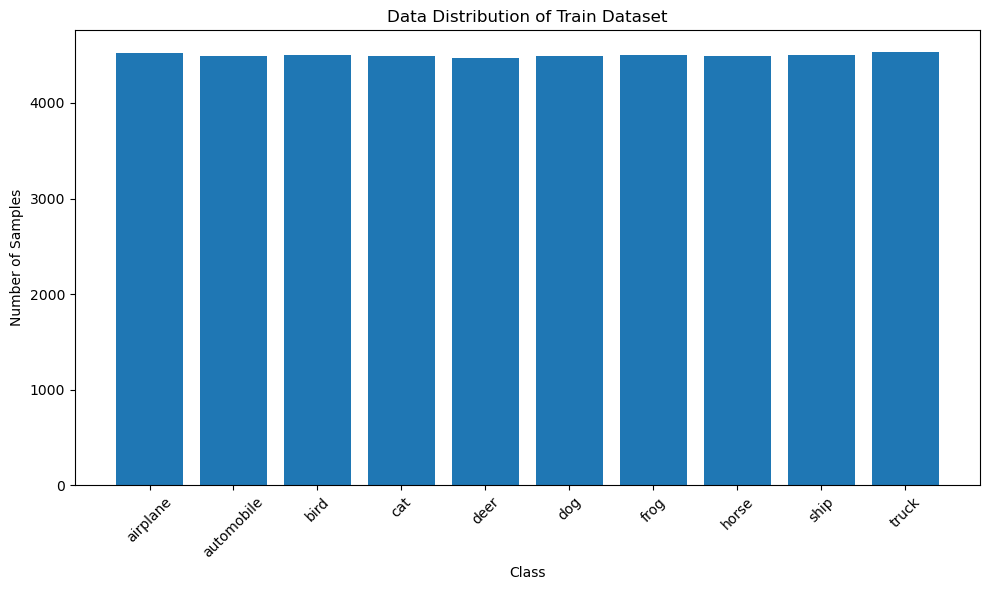

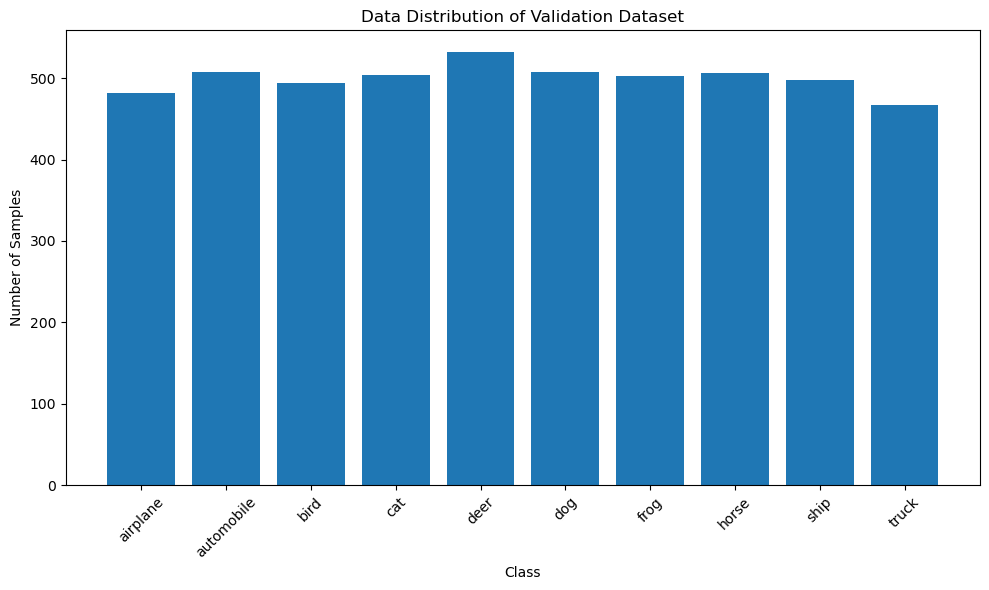

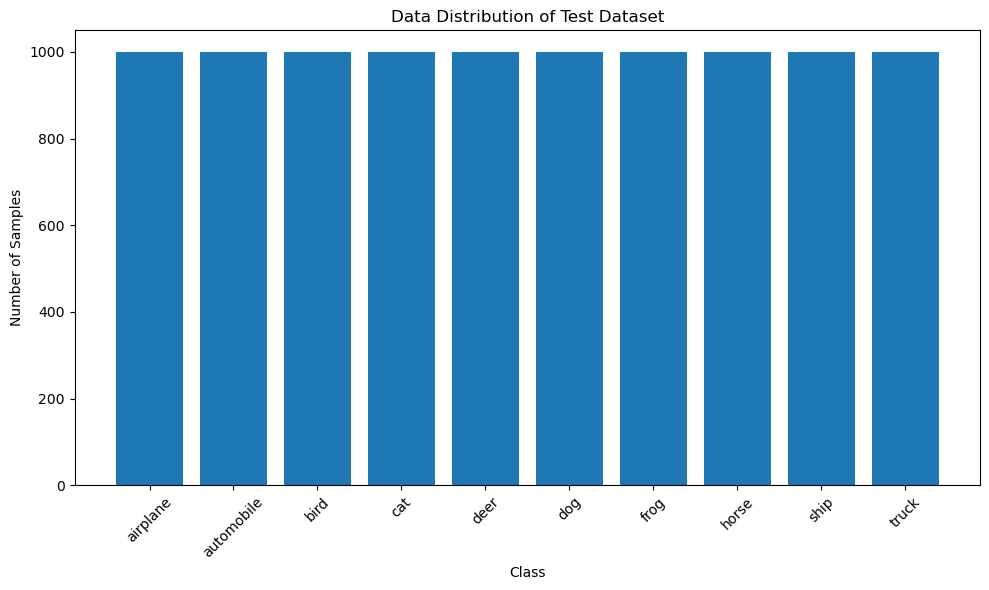

In [12]:


def plot_data_distribution(dataset, dataset_name):
    labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    class_counts = [0] * 10
    
    for _, label in dataset:
        class_counts[label] += 1
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(labels, class_counts)
    ax.set_xlabel('Class')
    ax.set_ylabel('Number of Samples')
    ax.set_title(f'Data Distribution of {dataset_name} Dataset')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualize data distribution for train dataset
plot_data_distribution(train_data, 'Train')

# Visualize data distribution for validation dataset
plot_data_distribution(val_data, 'Validation')

# Visualize data distribution for test dataset
test_loader = torch.utils.data.DataLoader(test_data, batch_size=len(test_data), shuffle=False)
test_images, test_labels = next(iter(test_loader))
test_dataset = list(zip(test_images, test_labels))
plot_data_distribution(test_dataset, 'Test')

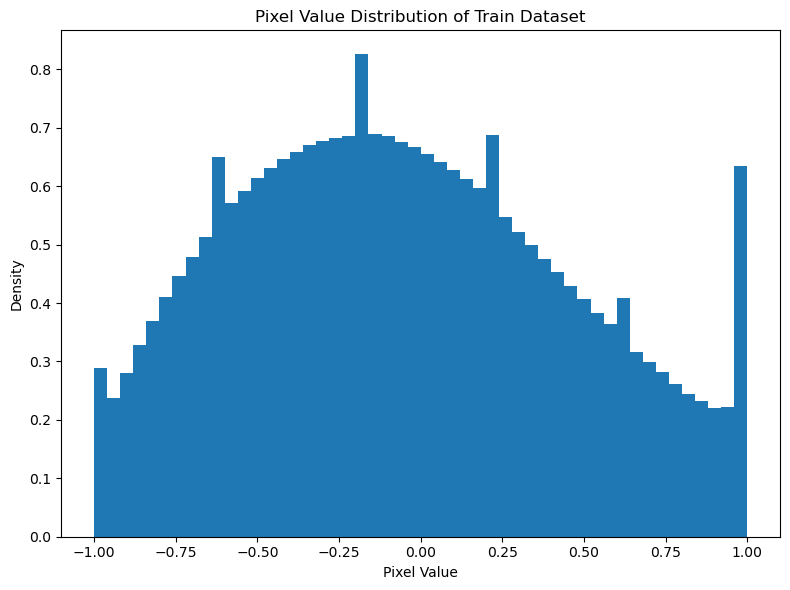

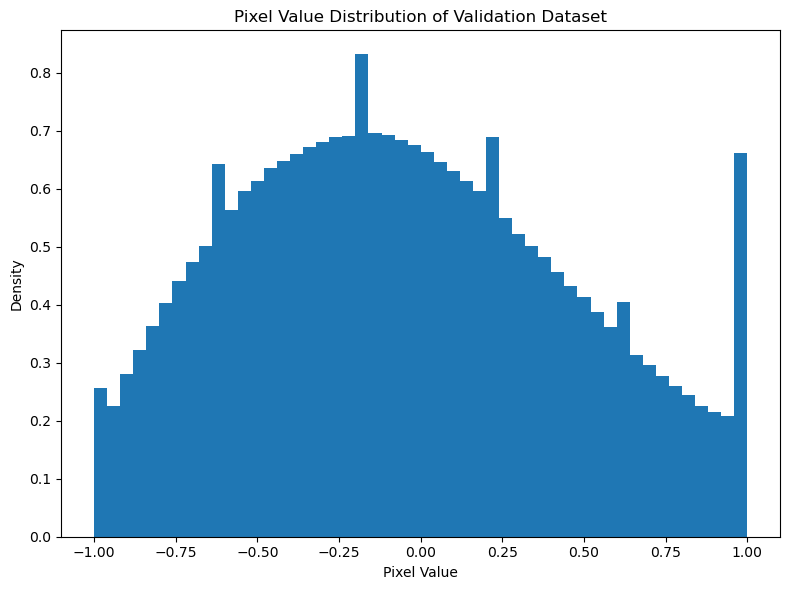

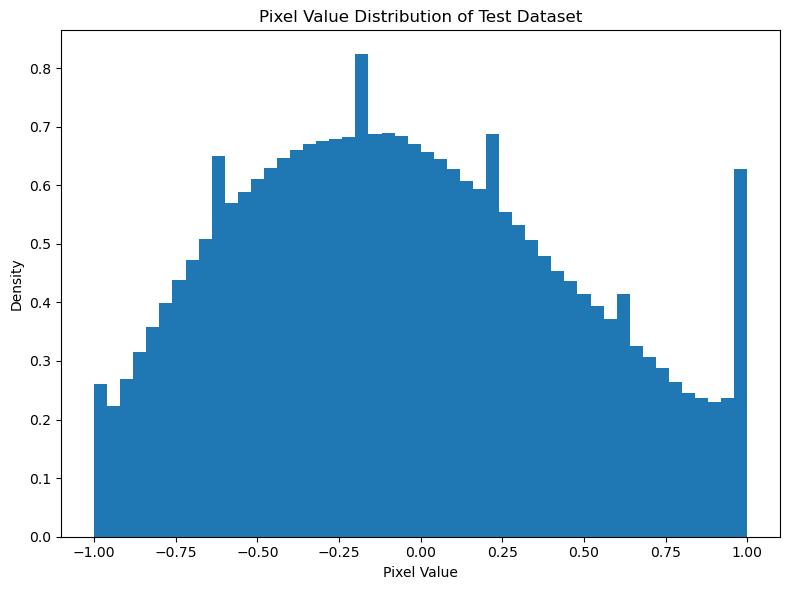

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_pixel_distribution(dataloader, dataset_name):
    pixel_values = []
    
    for images, _ in dataloader:
        pixel_values.extend(images.flatten().tolist())
    
    pixel_values = np.array(pixel_values)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.hist(pixel_values, bins=50, density=True)
    ax.set_xlabel('Pixel Value')
    ax.set_ylabel('Density')
    ax.set_title(f'Pixel Value Distribution of {dataset_name} Dataset')
    plt.tight_layout()
    plt.show()

# Inspect pixel value distribution for train dataset
plot_pixel_distribution(train_dataloader, 'Train')

# Inspect pixel value distribution for validation dataset
plot_pixel_distribution(val_dataloader, 'Validation')

# Inspect pixel value distribution for test dataset
plot_pixel_distribution(test_dataloader, 'Test')